In [15]:
# Importing  all the  libraries
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.datasets import fetch_california_housing  #importing  the fetch function to fetch the California housing dataset

# Loading the dataset as a dataframe
california = fetch_california_housing(as_frame=True)  #This will fetch the dataset and return it in a pandas dataframe
df = california.frame          
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [16]:
#Performing Exploratory Data Analysis (EDA) by printing the stats and checking for missing values

#Printing summary statistics for all the numerical columns in the DataFrame
print("Summary Statistics:\n", df.describe())  #this will give us the count, mean, std, min, max. 

Summary Statistics:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        

In [17]:
# Checking for missing values in the dataset
print("\nMissing Values:\n", df.isnull().sum())  #this will return the count of missing values in each column



Missing Values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


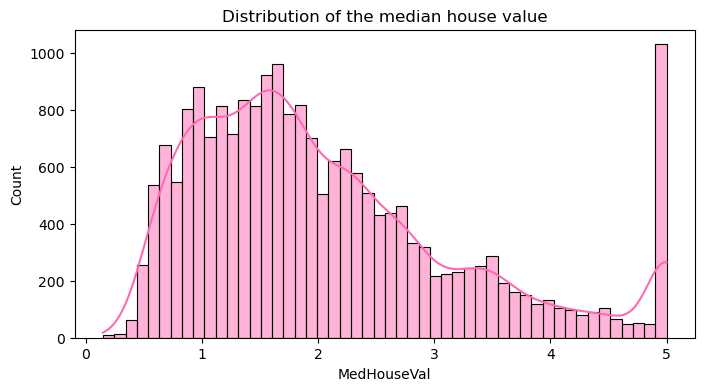

In [4]:
#Visualizing the key features: 

#Creating a histogram to visualize the distribution of the median house value
plt.figure(figsize=(8, 4))  
sns.histplot(df['MedHouseVal'], bins=50, kde=True, color='hotpink')  # plotting the histogram with 50 bins and KDE in hotpink
plt.title("Distribution of the median house value")  
plt.show()  # displaying the histogram plot


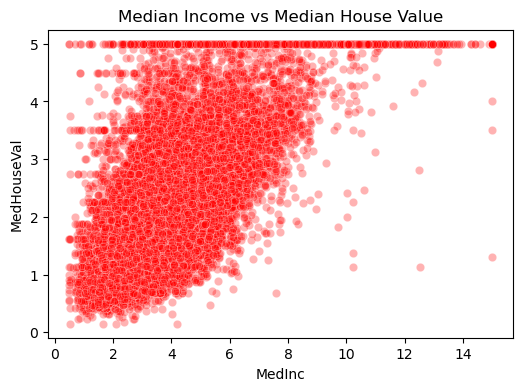

In [5]:
# Creating a scatter plot to examine the relationship between median income and median house value
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='MedInc', y='MedHouseVal', alpha=0.3, color='red') 
plt.title("Median Income vs Median House Value")
plt.show()  # displaying  the scatter plot

In [22]:
# Importing all the necessary modules from scikit-learn
from sklearn.model_selection import train_test_split  # Use it to split the dataset into training and testing sets
from sklearn.linear_model import LinearRegression      #importing  the linear regression model
from sklearn.tree import DecisionTreeRegressor         #importing  the Decision Tree Regressor model
from sklearn.metrics import mean_absolute_error, r2_score  # This will be used to  evaluate the  model's performance

# Splitting the data into features (X) and target variable (y)
X = df.drop('MedHouseVal', axis=1)  # Dropping the target column 'MedHouseVal' from df to get the feature set
y = df['MedHouseVal']               # Selecting 'MedHouseVal' column as our target variable 

#Splitting the dataset into training and testing sets
#80% will be used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating and training the linear regression model
lr_model = LinearRegression()       #Instantiating the Linear Regression model and training it on the training data
lr_model.fit(X_train, y_train)     

print(X)


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [23]:
print(y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


In [9]:
# Making predictions with the trained Linear Regression model on the test data
lr_preds = lr_model.predict(X_test)

lr_preds


array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [11]:
# Evaluating the Linear Regression model's performance
lr_mae = mean_absolute_error(y_test, lr_preds)  # Calculating the mean absolute error (Bala Priya C, 2024)
lr_mae

0.5332001304956556

In [12]:
lr_r2 = r2_score(y_test, lr_preds)              # Calculating r-squared score
lr_r2

0.575787706032451

In [13]:
# Creating and training the decision tree
dt_model = DecisionTreeRegressor(random_state=42)  # Instantiating the Decision Tree model with a fixed random state of 42, 
dt_model.fit(X_train, y_train)                     

# Making predictions with the trained Decision tree model on the test data
dt_preds = dt_model.predict(X_test)
dt_preds


array([0.414  , 1.203  , 5.00001, ..., 5.00001, 0.66   , 2.172  ])

In [14]:
# Evaluating the Decision Tree Regressor's performance
dt_mae = mean_absolute_error(y_test, dt_preds)  # Calculating Mean Absolute Error (datagy, 2022)
dt_r2 = r2_score(y_test, dt_preds)              # Calculating R-squared score  (Geeksforgeeks, 2020)

# Printing performance metrics of the Linear Regression model
print("\nLinear Regression Performance:") #scikit-learn, n.d.
print(f"MAE: {lr_mae:.4f}")      # Displaying the mean absolute error, and using 4f to round it to 4 decimal places
print(f"R^2 Score: {lr_r2:.4f}") # Displaying the r-squared score (Bala Priya C, 2024)

# Printing  the performance metrics of the decision tree
print("\nDecision Tree Regressor Performance:")
print(f"MAE: {dt_mae:.4f}")      
print(f"R^2 Score: {dt_r2:.4f}") 


Linear Regression Performance:
MAE: 0.5332
R^2 Score: 0.5758

Decision Tree Regressor Performance:
MAE: 0.4547
R^2 Score: 0.6221


In [24]:
# 1.(c) Interpretation and Discussion
print("\nInterpretation:")
print("Linear Regression assumes a linear relationship between features and the target. While it provides a good baseline, it Sunderperforms on non-linear data.")
print("Decision Tree Regressor captures non-linear relationships and may perform better, but is prone to overfitting without tuning.")

print("\nPossible Improvements:")
print("- Feature selection using correlation or importance scores to remove irrelevant or redundant features.")
print("- Preprocessing steps such as standardization or normalization.")
print("- Applying advanced models like Random Forest or Gradient Boosting.")
print("- Hyperparameter tuning (e.g., using GridSearchCV) for models like Decision Trees.")



Interpretation:
Linear Regression assumes a linear relationship between features and the target. While it provides a good baseline, it Sunderperforms on non-linear data.
Decision Tree Regressor captures non-linear relationships and may perform better, but is prone to overfitting without tuning.

Possible Improvements:
- Feature selection using correlation or importance scores to remove irrelevant or redundant features.
- Preprocessing steps such as standardization or normalization.
- Applying advanced models like Random Forest or Gradient Boosting.
- Hyperparameter tuning (e.g., using GridSearchCV) for models like Decision Trees.
